In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
#Reading the csv 
df = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv',encoding = 'ISO-8859-1')

In [163]:
#displaying the head to understand the data
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


In [164]:
#Displaying the summary stats of the data frame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
_unit_id,7156.0,7.243474e+08,250674.176598,7.242270e+08,7.243229e+08,7.243247e+08,7.243265e+08,726942343.0
_trusted_judgments,7156.0,5.834405e+00,11.144930,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,241.0
sentiment:confidence,7156.0,7.746541e-01,0.205363,2.480000e-01,6.306000e-01,7.531000e-01,1.000000e+00,1.0
our_id,7156.0,3.609931e+03,2140.401611,1.000000e+00,1.789750e+03,3.578500e+03,5.367250e+03,10077.0


In [166]:
#analysisng the unique values of sentiment column
df['sentiment'].unique()

array(['5', '2', '3', 'not_relevant', '1', '4'], dtype=object)

In [167]:
# Get the index of the rows where sentiment is "not_relevant"
not_relevant_idx = df[df["sentiment"] == "not_relevant"].index

# Drop the rows where sentiment is "not_relevant"
df = df.drop(index=not_relevant_idx)

In [168]:
#Displaying summary stats of the 'sentiment' column
df['sentiment'].astype(int).describe().transpose()

count    6943.000000
mean        3.209852
std         0.768440
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: sentiment, dtype: float64

In [170]:
#Mode of the 'sentiment' column
df['sentiment'].astype(float).mode()

0    3.0
Name: sentiment, dtype: float64

In [171]:
#Median of the 'sentiment' column
df['sentiment'].astype(float).median()

3.0

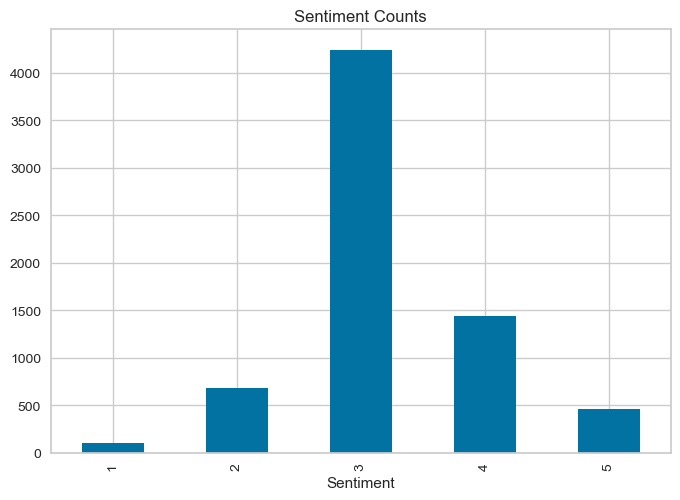

In [172]:
#Plotting the bar plot
# Count the number of occurrences of each sentiment value
sentiment_counts = df["sentiment"].value_counts().sort_index()

# Create a bar plot of the sentiment counts
sentiment_counts.plot.bar()

plt.title("Sentiment Counts")
plt.xlabel("Sentiment")

# Show the plot
plt.show()



From this plot we can see that the number of records for sentiment 3 are very high as compared to the other
values and thus the values other than 3 will have lower training data leading to lower accuracy

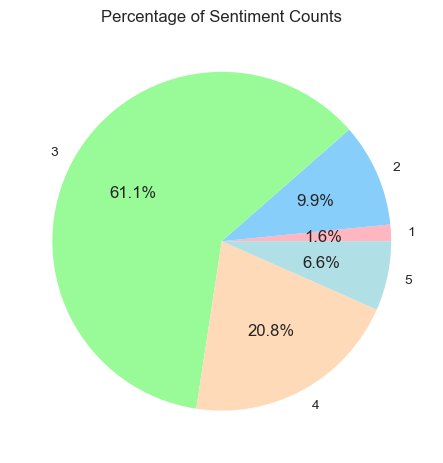

In [195]:
#Pie chart of counts of sentiment values
# Count the number of occurrences of each sentiment value
sentiment_counts = df["sentiment"].value_counts().sort_index()
# Define pastel colors
pastel_colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#FFDAB9', '#B0E0E6']
# Create a pie chart of the sentiment counts
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',colors=pastel_colors)
plt.title("Percentage of Sentiment Counts")
# Show the plot
plt.show()

Most of the data is concentrated with sentiment 3

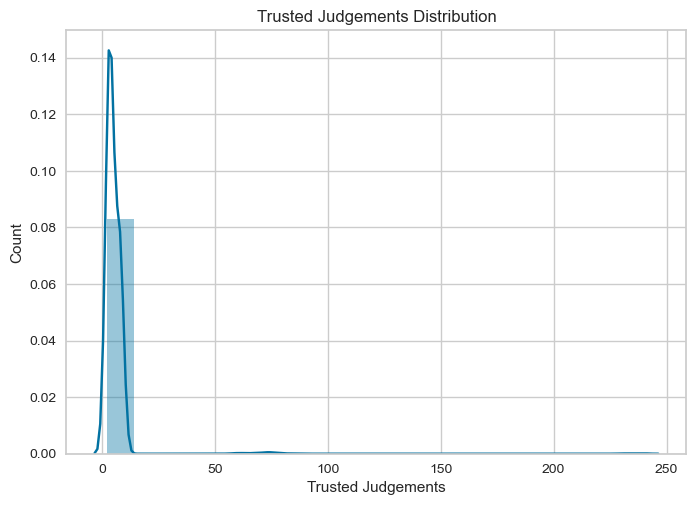

In [199]:
import warnings
warnings.filterwarnings('ignore')
# Create a distribution plot of the trusted judgements using Seaborn
sns.distplot(df["_trusted_judgments"], bins=20)
plt.title("Trusted Judgements Distribution")
plt.xlabel("Trusted Judgements")
plt.ylabel("Count")

# Show the plot
plt.show()

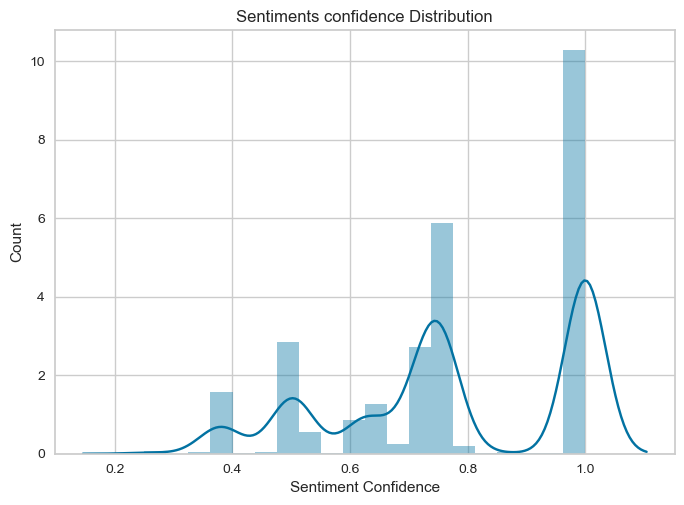

In [200]:
import warnings
warnings.filterwarnings('ignore')
# Create a distribution plot of the trusted judgements using Seaborn
sns.distplot(df["sentiment:confidence"], bins=20)

plt.title("Sentiments confidence Distribution")
plt.xlabel("Sentiment Confidence")
plt.ylabel("Count")

# Show the plot
plt.show()

In [176]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [201]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rutas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rutas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rutas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [178]:
#Tokenization and Lemmatization
# Initialize an empty list to store the filtered tokens for each tweet
filtered_tokens_list = []

# Iterate through each tweet in the 'text' column
for tweet in df['text']:
    # Check if tweet is a string or bytes-like object
    if isinstance(tweet, (str, bytes)):
        # Define a regex pattern to match punctuation and hashtags
        pattern = r'[^\w\s]|#'
        # Apply the regex pattern to remove punctuation and hashtags from the tweet
        tweet = re.sub(pattern, '', tweet)
        # Tokenize the tweet
        tweet = tweet.lower()
        tokens = nltk.word_tokenize(tweet)
        filtered_tokens = []
        # Remove the stopwords
        for token in tokens:
            if token not in stop_words:
                filtered_tokens.append(token)
        lemmatized_tokens = []
        for token in filtered_tokens:
            lemmatized_tokens.append(lemmatizer.lemmatize(token))
        # Exclude the frequent words and phrases and also words that are irrelevant
        exclude_words = ['self-driving', 'car', 'cars', 'driving', 'autonomous', 'vehicle', 'vehicles', 'driverless', 'selfdriving',
                         'self', 'could', 'would', 'rt', 'need', 'self', 'get', 'like', 'amp', 'saw', 'via', 'see', 'im', 'make', 'want', 'think',
                         'u', 'take', 'say', 'cant', 'one']
        filtered_tokens = [token for token in lemmatized_tokens if token not in exclude_words]
        filtered_tokens_list.append(filtered_tokens)
    else:
        # If tweet is not a string or bytes-like object, append an empty list to the filtered_tokens_list
        filtered_tokens_list.append([])

# Add a new column 'filtered_tokens' to the dataframe
df['filtered_tokens'] = filtered_tokens_list


In [179]:
#Printing the column 'filtered_columns'
df['filtered_tokens']

0           [two, place, id, invest, money, 3d, printing]
1       [awesome, google, help, blind, travel, often, ...
2       [google, map, keep, road, construction, suppos...
3       [seem, way, overhyped, given, technology, chal...
4                     [google, i34, painted, green, blue]
                              ...                        
7141            [florida, state, allows, testing, sayfie]
7142    [many, state, still, considering, allowing, te...
7143    [heading, tech, conference, focus, transportat...
7144                [fully, many, automation, technology]
7145              [new, study, commissioned, study, cost]
Name: filtered_tokens, Length: 6943, dtype: object

In [180]:
#Printing the head to display the data
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text,preprocessed_text,filtered_tokens
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...,two place invest money could 3d print car,"[two, place, id, invest, money, 3d, printing]"
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...,awesom googl driverless car help blind travel ...,"[awesome, google, help, blind, travel, often, ..."
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...,googl map ca keep road construct suppos trust ...,"[google, map, keep, road, construction, suppos..."
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...,autonom car seem way overhyp given technolog c...,"[seem, way, overhyped, given, technology, chal..."
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...,saw googl car paint green blue,"[google, i34, painted, green, blue]"


In [181]:
#concatenating all lists into a single list
flat_list = []
for sublist in df['filtered_tokens']:
    for item in sublist:
        flat_list.append(item)

In [182]:
#Calculating the top 20 frequent words
fdist = nltk.FreqDist(flat_list)

# Show the top 20 frequent tokens
print("Top 20 frequent tokens:")
for token, count in fdist.most_common(20):
    print(f"{token}: {count}")

Top 20 frequent tokens:
google: 3080
future: 324
drive: 289
road: 259
driver: 248
uber: 246
new: 232
california: 201
first: 187
street: 173
wheel: 169
look: 156
today: 155
people: 155
technology: 152
year: 152
go: 151
city: 144
time: 143
way: 141


In [186]:
#Logistic Regression for prediction
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Define the features and target variable
X = df['filtered_tokens'].apply(lambda x: ' '.join(x))
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_vect, y_train)

# Predict the sentiment scores for the test set
y_pred = lr.predict(X_test_vect)

#printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('\n')

#Displaying the top 10 words for each sentiment
print('Top words for sentiments')
for i in range(1, 6):
    indices = lr.coef_[i-1].argsort()[::-1][:10]
    top_words = [vectorizer.get_feature_names()[ind] for ind in indices]
    print(f"Top words for sentiment {i}: {top_words}")

Accuracy: 0.652267818574514


Top words for sentiments
Top words for sentiment 1: ['wtf', 'hell', 'fuck', 'never', 'crash', 'part', 'dont', 'cause', 'terrifying', 'die']
Top words for sentiment 2: ['scare', 'creepy', 'doesnt', 'unemployment', 'flaw', 'keep', 'ridiculous', 'government', 'donìââãt', 'creep']
Top words for sentiment 3: ['wonder', 'uk', 'inside', 'corner', 'minute', 'uber', 'music', 'eventually', 'automated', 'canada']
Top words for sentiment 4: ['cool', 'codecon', 'hurry', 'nice', 'kick', 'wish', 'best', 'deliver', 'thanks', 'check']
Top words for sentiment 5: ['awesome', 'amazing', 'excited', 'wait', 'incredible', 'love', 'cool', 'genius', 'exciting', 'enough']


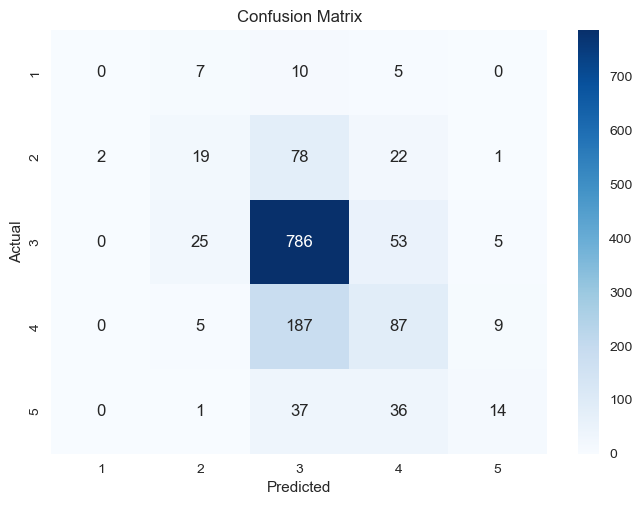

In [145]:
#Displaying the confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [188]:
# Generate the classification report
print('Classification Report')
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.33      0.16      0.21       122
           3       0.72      0.90      0.80       869
           4       0.43      0.30      0.35       288
           5       0.48      0.16      0.24        88

    accuracy                           0.65      1389
   macro avg       0.39      0.30      0.32      1389
weighted avg       0.60      0.65      0.61      1389



The model's ability to correctly identify instances of different ratings varies significantly. It fails to identify instances of rating 1, as indicated by its precision, recall, and F1-score, which are all 0.0. 
For rating 2, the model's performance is poor, with a low precision of 0.33, a low recall of 0.16, and a low F1-score of 0.21. However, for rating 3, the model performs well, with a high precision of 0.72, a high recall of 0.90, and a high F1-score of 0.80. 
The model's performance for rating 4 is moderate, but not great, with a precision of 0.43, a recall of 0.30, and an F1-score of 0.35. 
For rating 5, the model's performance is also not great, with a precision of 0.48, a recall of 0.16, and an F1-score of 0.24. Overall, the model's performance varies significantly across different ratings, with its strongest performance for rating 3, while its performance for the other ratings is not very consistent. 
The accuracy of the model is 0.65. 
A better and evenly distributed dataset across all sentiments might help with improving accuracy of the model